In [307]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scp
from scipy import optimize
from scipy import special
from scipy import stats

def sample(func,params,rate):
    searching = True
    time = 0
    while searching:
        nextPassage = func(*params)
        nextRate = np.random.exponential(1/rate)
        if nextRate>nextPassage:
            searching = False
            time += nextPassage
        else:
            time += nextRate
    return time

def pade4_2(x,A,U1,D1,U2,D2,D3,D4):
    return (U2*x**2+x*U1+A)/(D4*x**4+D3*x**3+D2*x**2+x*D1+A)

def moonWalkPrediction(func,values,rate,stepSize,forwardStep=1e-6,forwardN=100):
    
    # zs = np.linspace(0,forwardStep,forwardN)
    zs = np.linspace(0,stepSize*forwardN,forwardN+1)
    mus = []
    for z in zs:
        Tr = sum(np.exp(-z*values))/len(values)
        mus.append((1-Tr)/(z*Tr))
    mus[0] = np.mean(values)
    for i in range(int(rate/stepSize)):
        zs = zs + stepSize
        Trs = 1/(mus*zs+1)
        zs = np.insert(zs,0,0)
        Trs = np.insert(Trs,0,1)
        try:
            fit = scp.optimize.curve_fit(func, zs, Trs,bounds=(0,np.inf))
            mus.insert(0,(fit[0][2]-fit[0][1])/fit[0][0])
        except:
            mus.insert(0,mus[0])

    zs = zs + rate - stepSize*int(rate/stepSize)
    Trs = 1/(mus*zs+1)
    zs = np.insert(zs,0,0)
    Trs = np.insert(Trs,0,1)
    try:
        fit = scp.optimize.curve_fit(func, zs, Trs,bounds=(0,np.inf))
        mus.insert(0,(fit[0][2]-fit[0][1])/fit[0][0])
    except:
        print("error",)
        mus.insert(0,mus[0]) 
    return zs, mus

def order1(x,M1):
    return M1*x/(x-M1*x**2)

def order2(x,M1,M2):
    return (M1*x-M2/2*x**2)/(x-M1*x**2+M2/2*x**3)

def order3(x,M1,M2,M3):
    return (M1*x-M2/2*x**2+M3/6*x**3)/(x-M1*x**2+M2/2*x**3-M3/6*x**4)

def order4(x,M1,M2,M3,M4):
    Tr = 1-M1*x+M2/2*x**2-M3/6*x**3+M4/24*x**4
    return (1-Tr)/(Tr*x)

def order5(x,M1,M2,M3,M4,M5):
    Tr = 1-M1*x+M2/2*x**2-M3/6*x**3+M4/24*x**4-M5/100*x**5
    return (1-Tr)/(Tr*x)

def padeTr4_2(x,A,U1,D1,U2,D2,D3,D4):
    Tr = (U2*x**2+x*U1+A)/(D4*x**4+D3*x**3+D2*x**2+x*D1+A)
    return (1-Tr)/(Tr*x)
def poly2(x,A0,A1,A2):
    return A0+A1*x+A2*x**2

## Gamma

/tmp/ipykernel_1232524/1914960756.py:8: RuntimeWarning: invalid value encountered in true_divide
  mus = (1-Trs)/(Trs*rs)
/home/ofirblumer/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1232524/1769608593.py:76: RuntimeWarning: invalid value encountered in true_divide
  return (1-Tr)/(Tr*x)


157.47896025053123

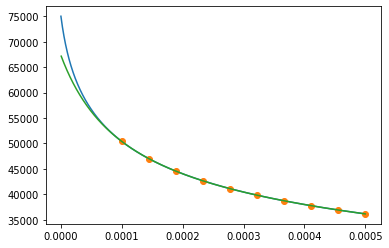

In [310]:
k = 0.75
theta = 1e5

# exact

rs = np.linspace(0,0.0005,1000)
Trs = (1+rs*theta)**(-k)
mus = (1-Trs)/(Trs*rs)
mus[0] = k*theta
plt.plot(rs,mus)

# exact points

selrs = np.linspace(0.0001,0.0005,10)
Trs = (1+selrs*theta)**(-k)
mus = (1-Trs)/(Trs*selrs)
plt.plot(selrs,mus,"o")

# first order
# order = poly2
# fit = scp.optimize.curve_fit(order, selrs, mus)

# plt.plot(rs,order(rs,*fit[0]))
# A4,A3,A2,A1,A0 = np.polyfit(selrs,mus,4)
# plt.plot(rs,A0+A1*rs+A2*rs**2+A3*rs**3+A4*rs**4)
# A0
def customFit(x,theta,k):
    Trs = (1+x*theta)**(-k)
    return (1-Trs)/(Trs*x)
fit = scp.optimize.curve_fit(padeTr4_2, selrs, mus)

plt.plot(rs,padeTr4_2(rs,*fit[0]))
fit[0][0]*fit[0][1]

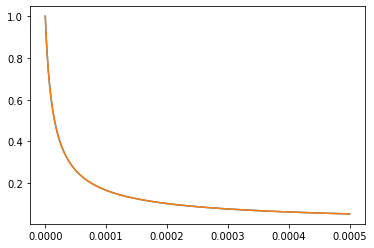

In [264]:
# exact

rs = np.linspace(0,0.0005,1000)
selrs = np.linspace(0.0001,0.0005,10)
Trs = (1+rs*theta)**(-k)
selTrs = (1+selrs*theta)**(-k)
plt.plot(rs,Trs)

def gammaLaplace(x,theta,k):
    return (1+x*theta)**(-k)
fit = scp.optimize.curve_fit(gammaLaplace, selrs, selTrs)
plt.plot(rs,gammaLaplace(rs,*fit[0]))


## Frechet

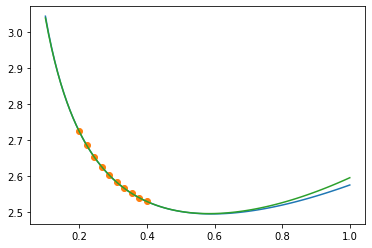

In [309]:
rs = np.linspace(0.1,1,100)
Trs = 2*np.sqrt(rs)*scp.special.kn(1,2*np.sqrt(rs))
mus = (1-Trs)/(rs*Trs)
plt.plot(rs,mus)

selrs = np.linspace(0.2,0.4,10)
selTrs = 2*np.sqrt(selrs)*scp.special.kn(1,2*np.sqrt(selrs))
selmus = (1-selTrs)/(selrs*selTrs)
plt.plot(selrs,selmus,"o")

order = padeTr4_2
fit = scp.optimize.curve_fit(order, selrs, selmus,bounds=(0,np.inf))

plt.plot(rs,order(rs,*fit[0]))

/tmp/ipykernel_1232524/1450392991.py:3: RuntimeWarning: invalid value encountered in true_divide
  mus = (1-Trs)/(Trs*rs)
/tmp/ipykernel_1232524/358960300.py:30: RuntimeWarning: invalid value encountered in double_scalars
  mus.append((1-Tr)/(z*Tr))


69481.13271765715

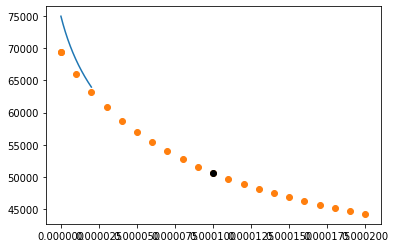

In [174]:
rs = np.linspace(0,0.00002,1000)
Trs = (1+rs*theta)**(-k)
mus = (1-Trs)/(Trs*rs)
mus[0] = k*theta
plt.plot(rs,mus,zorder=0)

repeats = 100000
rate = 1e-4
samples = np.array([sample(np.random.gamma,[k,theta],rate) for i in range(repeats)])
for stepSize in [1e-5]:
    zs, mus = moonWalkPrediction(func=pade4_2,values=samples,forwardN=10,forwardStep=rate,stepSize=stepSize,rate=rate)
    plt.plot(zs,mus,"o",zorder=1)

plt.scatter(rate,samples.mean(),c="black",zorder=2)
mus[0]
# rs = np.linspace(0,0.0001,1000)
# Trs = np.array([sum(np.exp(-r*samples))/repeats for r in rs])
# mus = (1-Trs)/(Trs*rs)
# mus[0] = samples.mean()
# rs = np.linspace(1e-7,0.0001,10)
# means = [np.array([sample(np.random.gamma,[k,theta],r) for i in range(10000)]).mean() for r in rs]
# plt.plot(rs,means,"o")

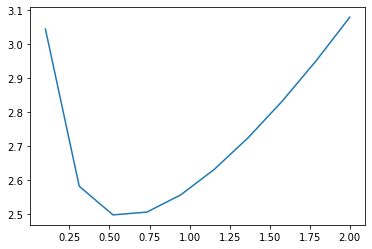

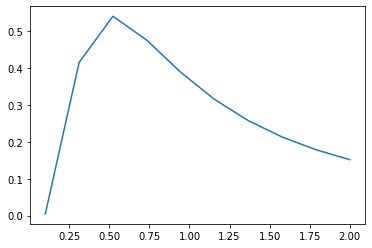

In [186]:
plt.plot(rs,scp.stats.invweibull.pdf(rs,1))